## Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv("INPUT/diamonds_train.csv").drop(columns={"Unnamed: 0"})
print(df.shape)
df.head()

(40345, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [3]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
df.describe()

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

### Variables Distribution

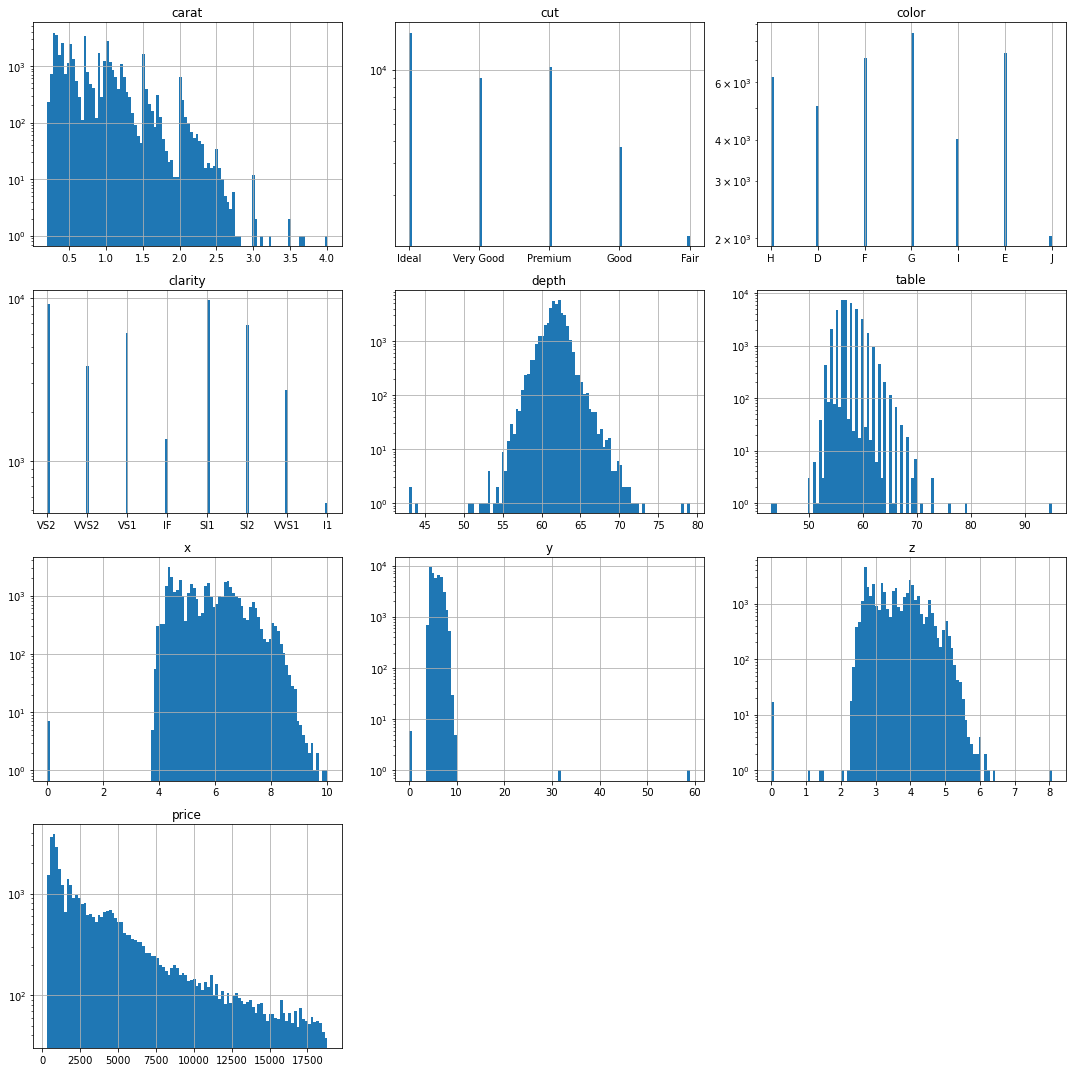

In [6]:
fig = plt.figure(figsize=(15, 15))

for n, col in enumerate(df.columns):
    axs = fig.add_subplot(4, 3, n+1)
    axs.set_title(col)
    axs.set_yscale("log")
    df[col].hist(ax=axs, bins=100)

fig.tight_layout()
plt.show()

In [7]:
df[(df.x==0)|(df.y==0)|(df.z==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
4960,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,0.0,18788
5127,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
6571,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.0,12800
10971,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383
12572,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
15252,1.20,Premium,D,VVS1,62.1,59.0,0.00,0.00,0.0,15686
15518,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564
18027,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
18658,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,3837
20916,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167


#### Check df Test to keep or drop any x, y ,z

In [8]:
df_test = pd.read_csv("INPUT/diamonds_test.csv").drop(columns={"Unnamed: 0"})
print(df_test.shape)
df_test.head()

(13449, 9)


,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [9]:
df_test[(df_test.x==0)|(df_test.y==0)|(df_test.z==0)]

,carat,cut,color,clarity,depth,table,x,y,z
3694,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0
10393,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0


##### We see there are z=0 in the test df, so we will drop just rows with x=0 & y=0 & z=0

In [10]:
df.drop(df[(df.x==0)&(df.y==0)&(df.z==0)].index, axis=0, inplace=True)
print(df.shape)

(40339, 10)


### Correlation of Quantitave Variables

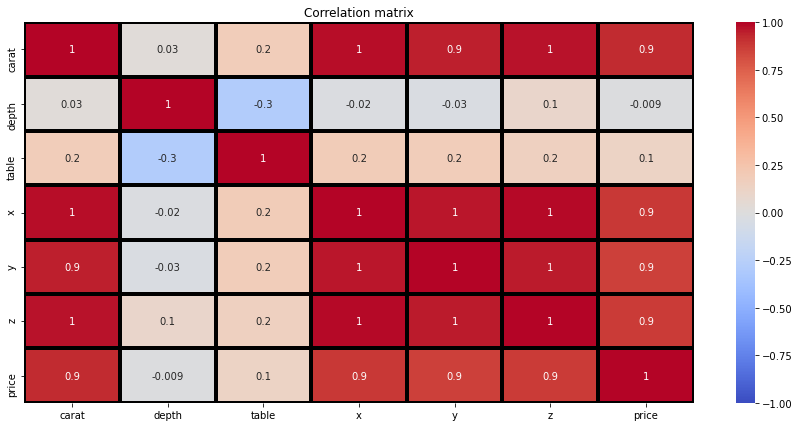

In [11]:
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm' , linewidths=3, linecolor='black')

plt.title('Correlation matrix')

plt.show()

### Relevance of Qualitative Variables

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula = "price ~ cut + color + clarity", data = df)
reg = model.fit()
anova = sm.stats.anova_lm(reg, typ=2)
anova

,sum_sq,df,F,PR(>F)
cut,4.361523e+09,4.0,73.511588,3.528076e-62
color,1.845720e+10,6.0,207.392095,1.379575e-261
clarity,1.513069e+10,7.0,145.726432,2.947769e-213
Residual,5.980723e+11,40321.0,NaN,NaN


##### All the vals have p-value < 0.05, so the variables influence in price variance

#### Frequency and Price relation of the Qualitative Variables

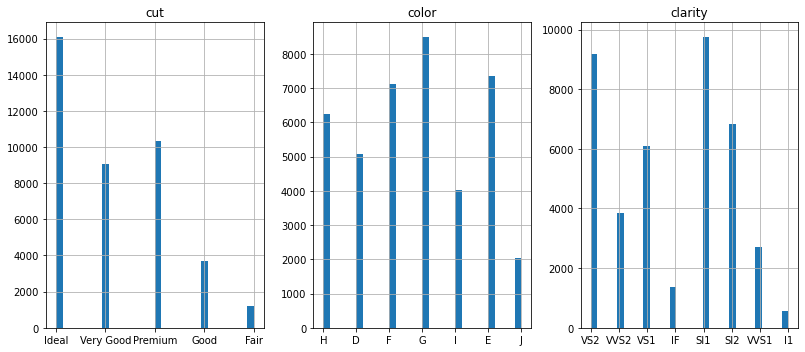

In [13]:
f = plt.figure(figsize=(15, 5))

for n, col in enumerate(df.iloc[:, 1:4].columns):
    axs = f.add_subplot(1, 4, n+1)
    axs.set_title(col)
    df[col].hist(ax=axs, bins=30)

plt.tight_layout()
plt.show()

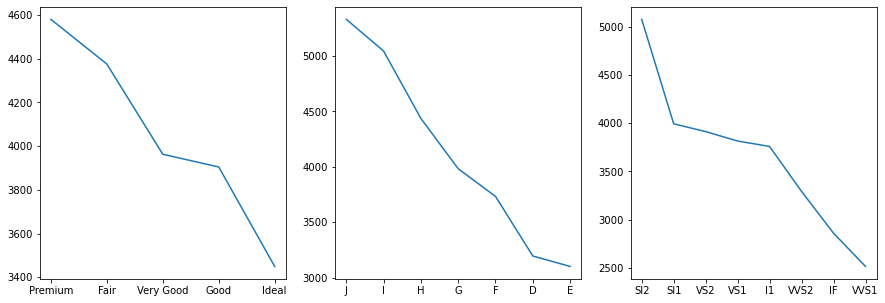

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(df.groupby("cut").agg({"price":"mean"}).sort_values(by="price", ascending=False))
ax2.plot(df.groupby("color").agg({"price":"mean"}).sort_values(by="price", ascending=False))
ax3.plot(df.groupby("clarity").agg({"price":"mean"}).sort_values(by="price", ascending=False))

plt.show()

### Feature Engineering

In [15]:
df["size"] = df.x * df.y * df.z
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,size
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134,190.734930
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532,45.921708
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103,69.338592
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600,43.362176
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997,176.802840


In [19]:
#make ordinal encoding of qualitative vars based on priceG

cut_dict = {"Ideal":5, "Premium":4, "Very Good":3, "Good":2, "Fair":1}

color_dict = {"G":7, "H":6, "F":5, "E":4, "I":3, "D":2, "J":1}

clarity_dict = {"SI1":8, "VS2":7, "SI2":6, "VS1":5, "WS2":4, "WS1":3, "IF":2, "I1":1}

df["cut_ord"] = df.cut.map(cut_dict)
df["color_ord"] = df.color.map(color_dict)
df["clarity_ord"] = df.clarity.map(clarity_dict)

df_quant = df.drop(columns={"cut", "color", "clarity", "size"})
df_quant_eng = df.drop(columns={"cut", "color", "clarity", "x", "y", "z"})
df = df.drop(columns={"cut_ord", "color_ord", "clarity_ord", "size"})

### Correlation

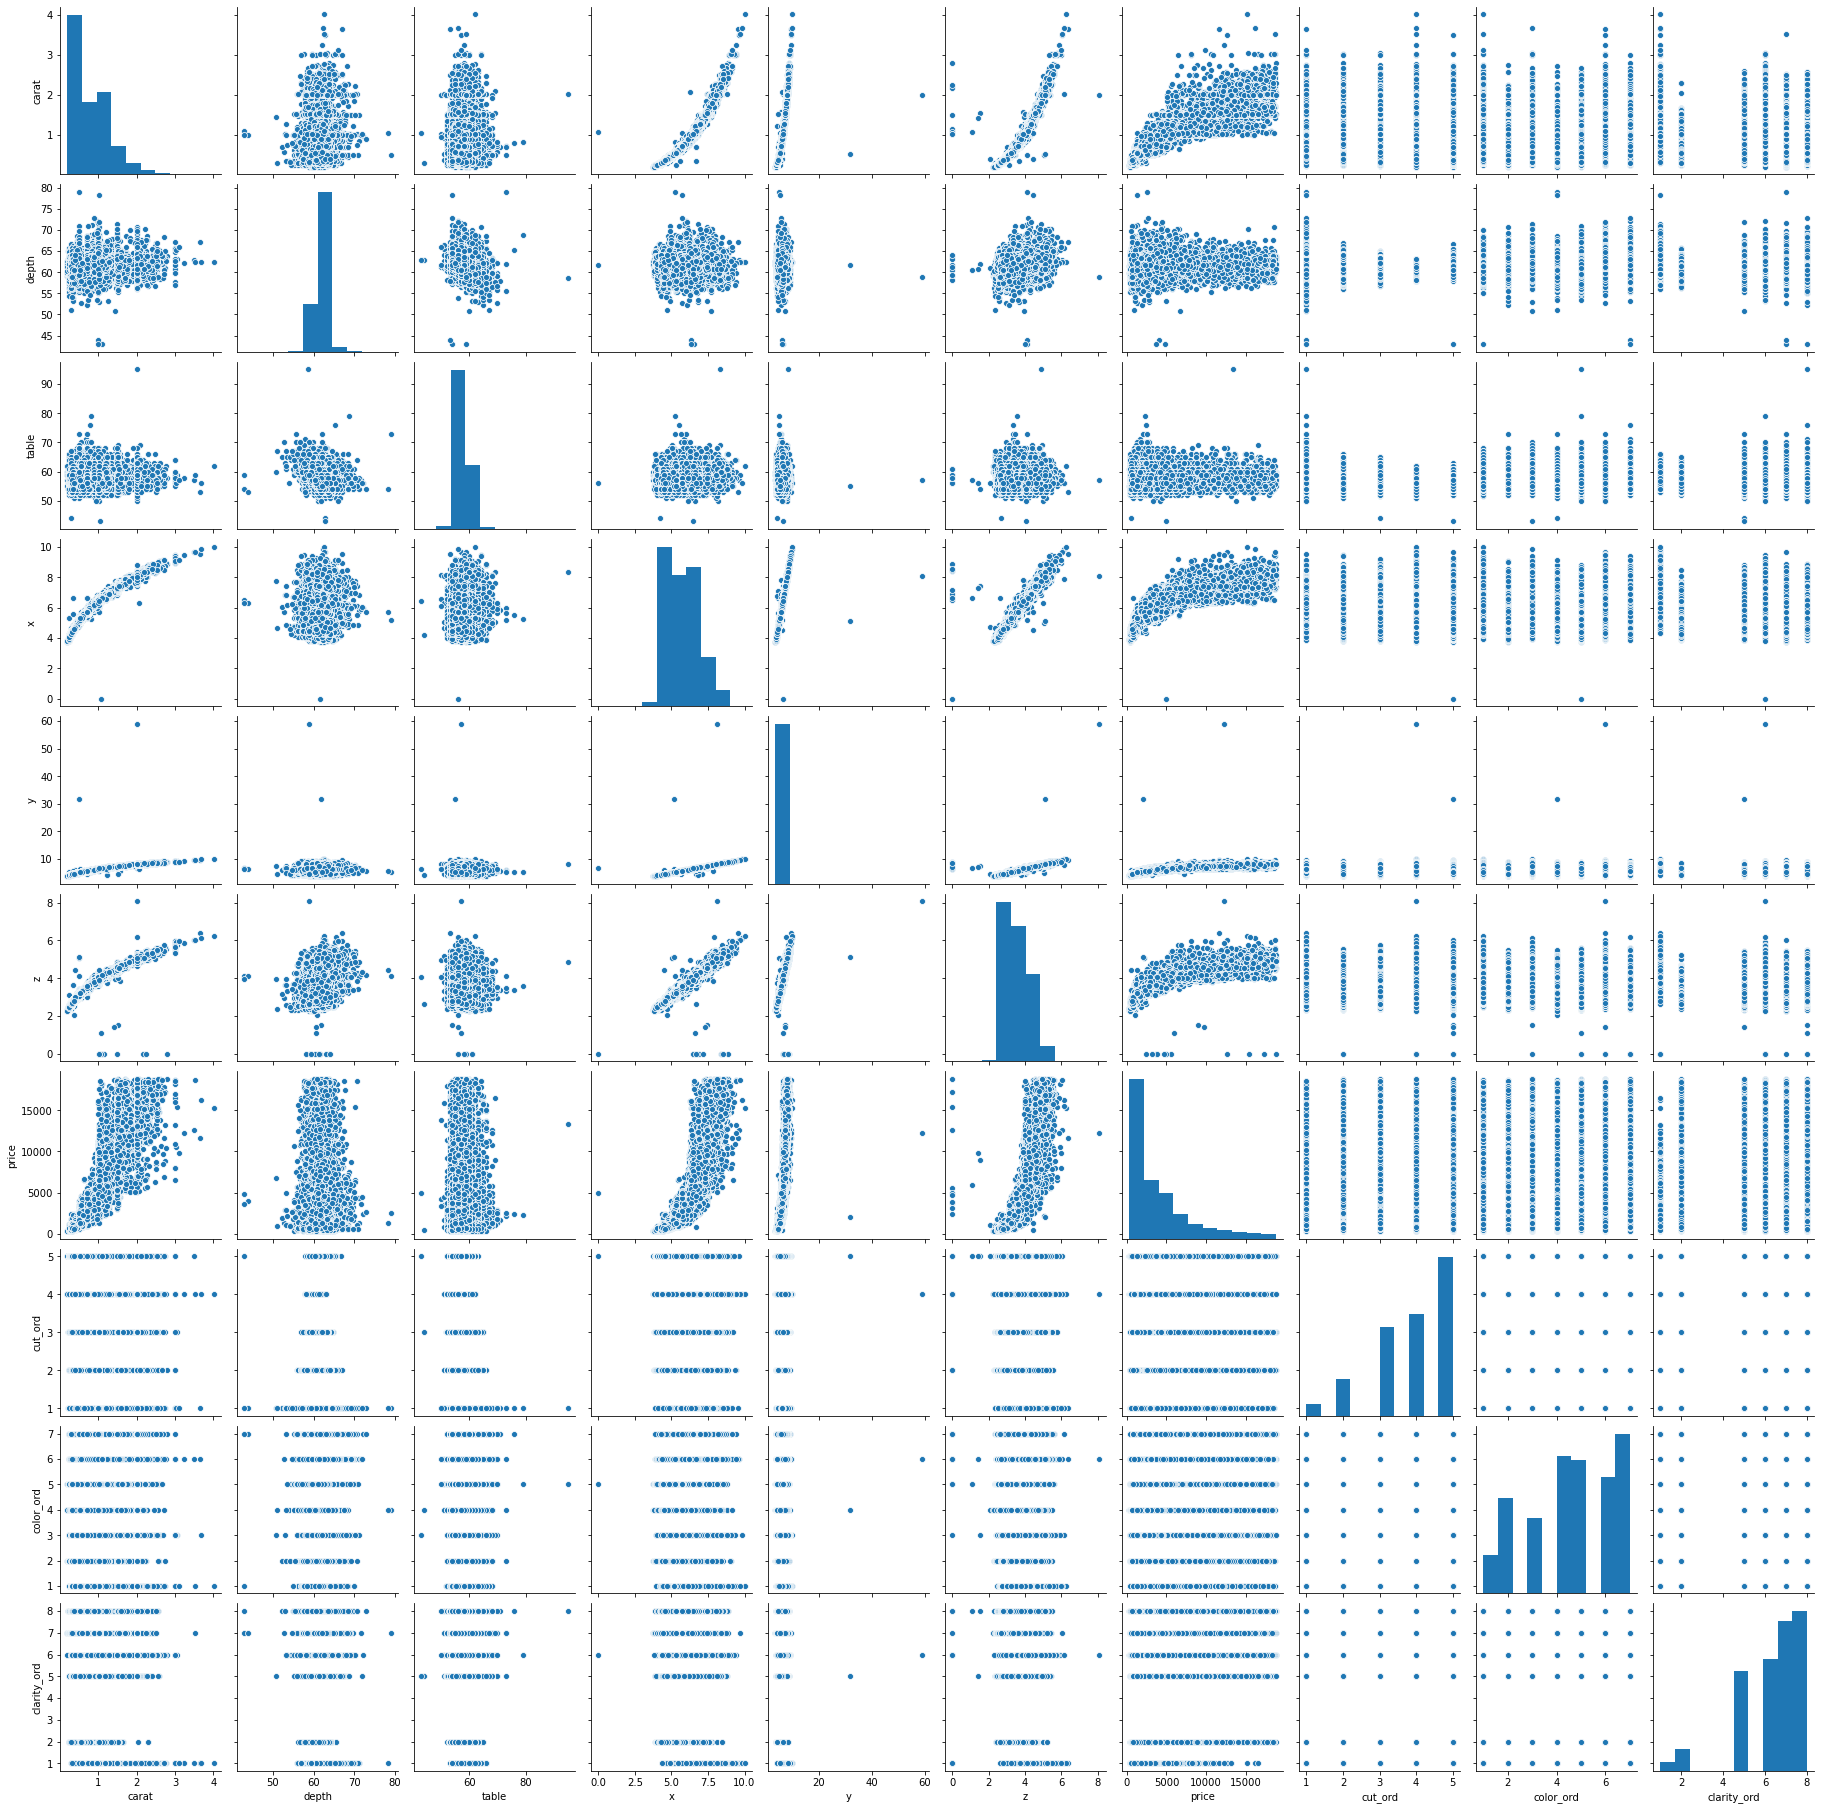

In [20]:
sns.pairplot(df_quant)

plt.show()